# Ejercicio Regresion de SalePrice

## Configuración inicial del notebook

### Carga las librerías necesarias

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga el dataset

In [154]:
house_price_sample=pd.read_csv('Data/sample_submission.csv')

In [155]:
house_price_test = pd.read_csv('Data/test.csv')
house_price_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [156]:
house_price_train = pd.read_csv('Data/train.csv')
house_price_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [157]:
test_sample = pd.merge(house_price_sample, house_price_test, left_on='Id', right_on='Id', how='inner')
test_sample.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,169277.052498,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,187758.393989,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,183583.683570,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,179317.477511,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,150730.079977,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Analisis descriptivo

In [158]:
house_price_train.shape

(1460, 81)

In [159]:
house_price_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [160]:
house_price_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [161]:
house_price_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [162]:
house_price_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [163]:
house_price_train.mean(numeric_only=True)

Id                  730.500000
MSSubClass           56.897260
LotFrontage          70.049958
LotArea           10516.828082
OverallQual           6.099315
OverallCond           5.575342
YearBuilt          1971.267808
YearRemodAdd       1984.865753
MasVnrArea          103.685262
BsmtFinSF1          443.639726
BsmtFinSF2           46.549315
BsmtUnfSF           567.240411
TotalBsmtSF        1057.429452
1stFlrSF           1162.626712
2ndFlrSF            346.992466
LowQualFinSF          5.844521
GrLivArea          1515.463699
BsmtFullBath          0.425342
BsmtHalfBath          0.057534
FullBath              1.565068
HalfBath              0.382877
BedroomAbvGr          2.866438
KitchenAbvGr          1.046575
TotRmsAbvGrd          6.517808
Fireplaces            0.613014
GarageYrBlt        1978.506164
GarageCars            1.767123
GarageArea          472.980137
WoodDeckSF           94.244521
OpenPorchSF          46.660274
EnclosedPorch        21.954110
3SsnPorch             3.409589
ScreenPo

In [164]:
house_price_train.median(numeric_only=True)

Id                  730.5
MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float

In [165]:
twenty_fifth = house_price_sample["SalePrice"].quantile(0.25)
median = house_price_sample["SalePrice"].median()
seventy_fifth = house_price_sample["SalePrice"].quantile(0.75)
maximum = house_price_sample["SalePrice"].max()

In [166]:
iqr=seventy_fifth-twenty_fifth
upper = seventy_fifth + (1.5 * iqr)
lower = twenty_fifth - (1.5 * iqr)

In [167]:
house_price_sample = house_price_sample[(house_price_sample["SalePrice"] < upper) & (house_price_sample["SalePrice"] > lower)]
print(upper, lower)

213919.00660578726 141573.41395900928


In [168]:
house_price_sample.select_dtypes(include='number').corr()['SalePrice'].sort_values(ascending=False)

SalePrice    1.000000
Id           0.116385
Name: SalePrice, dtype: float64

In [169]:
df_num = house_price_train.select_dtypes(include=['int64', 'float64'])

In [170]:
df_num = df_num.drop('Id', axis=1)

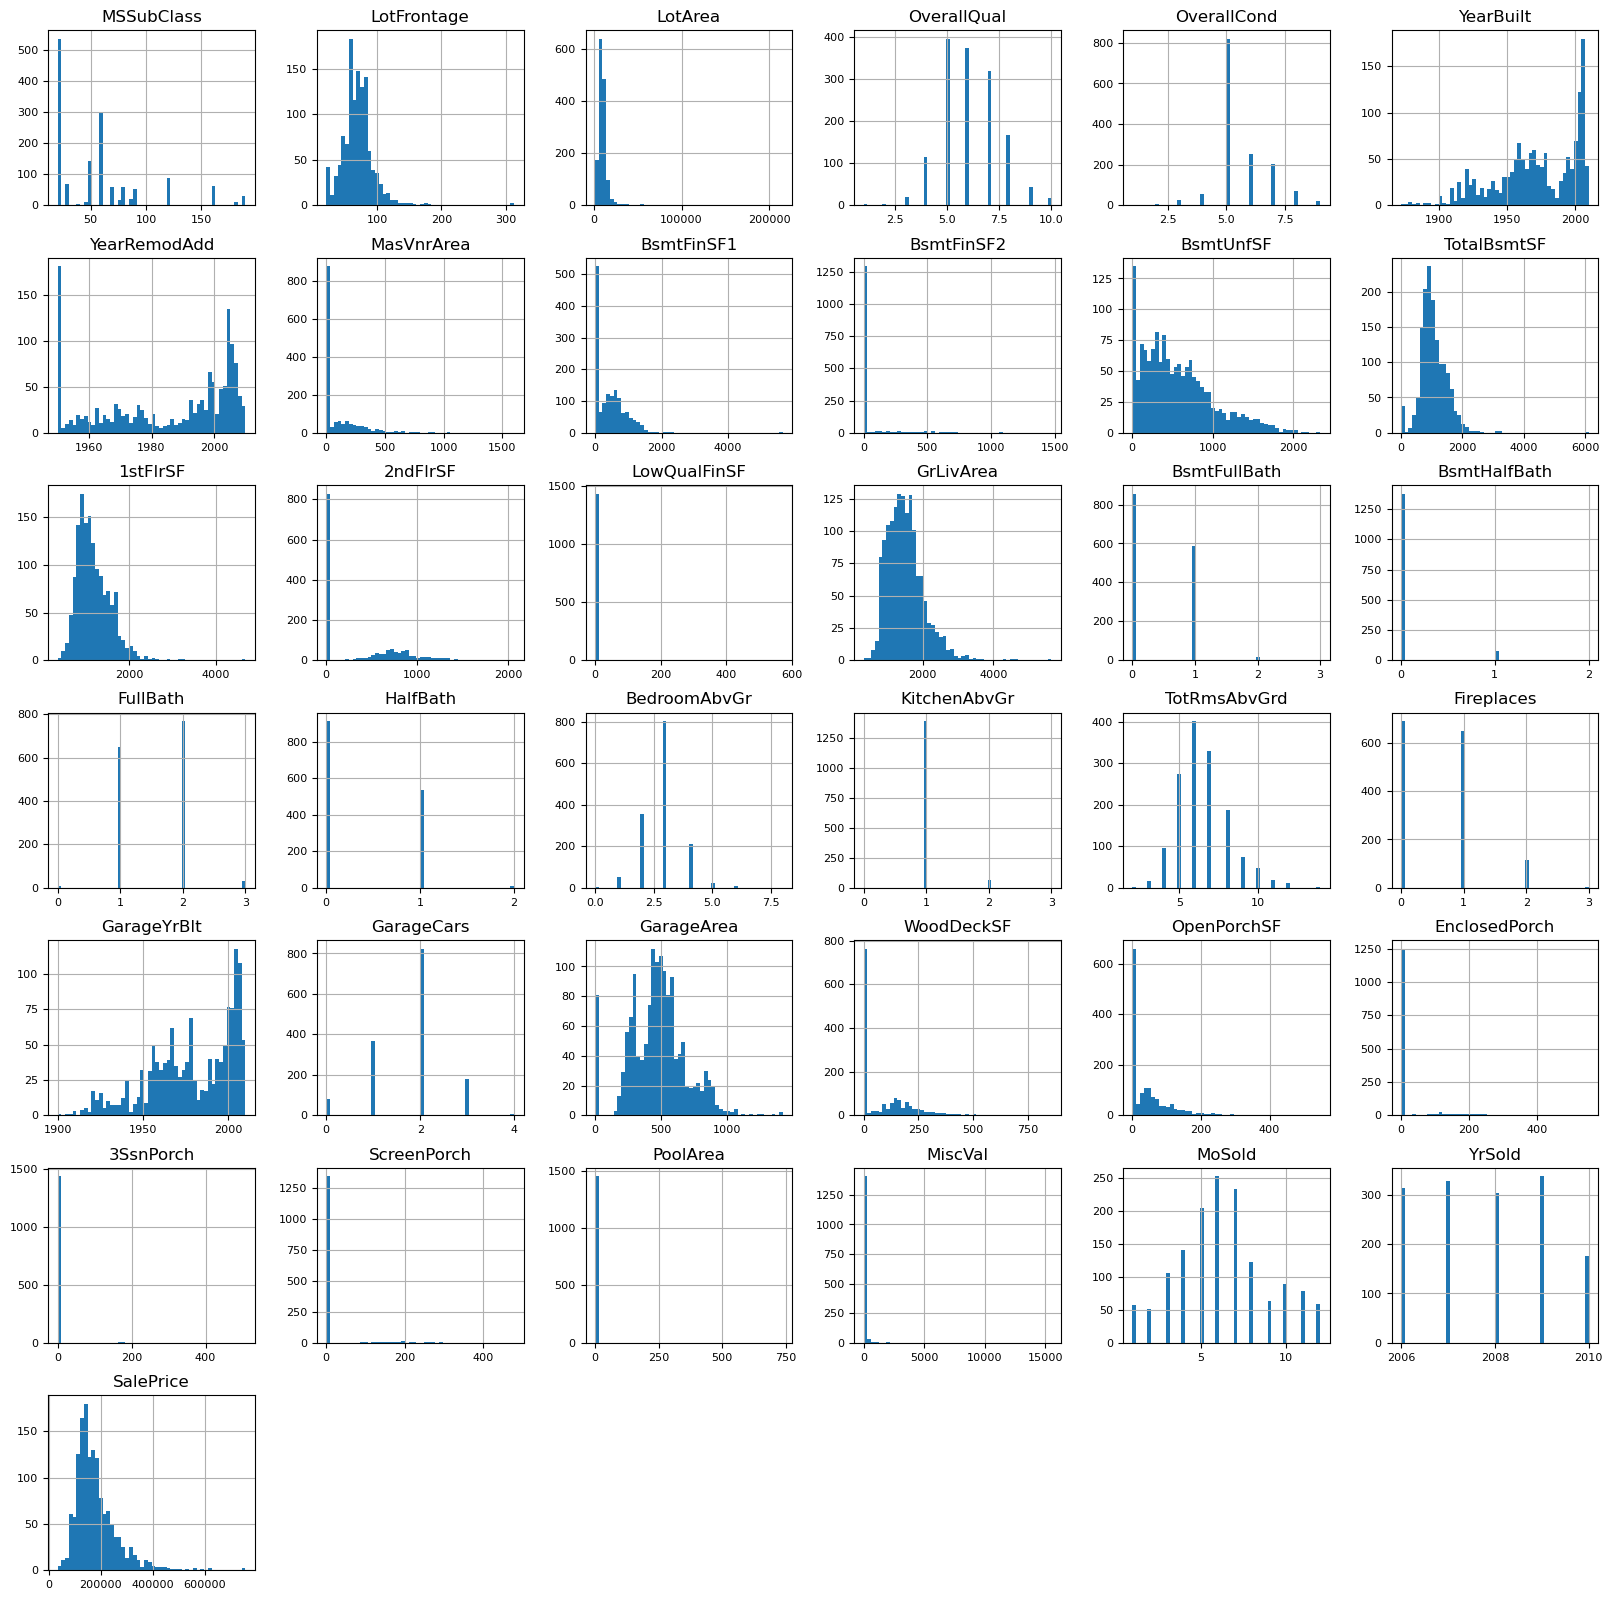

In [171]:
df_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Encontrar los valores faltantes

Debido a que son un total de 81 columnas, vamos a filtrar las columnas en las que hay valores faltantes

In [172]:
columns_with_missing = house_price_train.isna().sum()[house_price_train.isna().sum() > 0]
columns_with_missing.sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

### Borrar columnas con muchos valores faltantes

Esto se puede hacer de varias maneras, pero en este caso vamos a eliminar las columnas que tienen más del 30% de valores faltantes. Ademas eliminamos la columna Id, ya que no es relevante para el análisis.

In [173]:
threshold_colum = len(house_price_train) * 0.3
cols_to_drop = house_price_train.columns[house_price_train.isna().sum() > threshold_colum]
cols_to_drop = cols_to_drop.append(pd.Index(['Id']))
print(cols_to_drop)

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',
       'Id'],
      dtype='object')


In [174]:
house_price_train.drop(columns=cols_to_drop, inplace=True)

#### Revisar el resultado de la eliminación de columnas

Ahora, vamos a revisar las columnas restantes para ver si hay columnas que tienen valores faltantes.

In [175]:
missing_values_after_drop = house_price_train.isnull().sum()
columns_with_missing_after_drop = missing_values_after_drop[missing_values_after_drop > 0]
columns_with_missing_after_drop

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

### Imputar valores faltantes

#### Imputar valores numéricos

En este caso, vamos a imputar los valores faltantes con la media de la columna

In [176]:
house_price_train['LotFrontage'] = house_price_train['LotFrontage'].fillna(house_price_train['LotFrontage'].median())
house_price_train['MasVnrArea'] = house_price_train['MasVnrArea'].fillna(house_price_train['MasVnrArea'].median())
house_price_train['GarageYrBlt'] = house_price_train['GarageYrBlt'].fillna(house_price_train['GarageYrBlt'].median())

#### Imputar valores categóricos

En este caso, vamos a imputar los valores faltantes con la moda de la columna

In [177]:
categorical_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in categorical_columns:
    house_price_train[col] = house_price_train[col].fillna(house_price_train[col].mode()[0])

#### Revisar el resultado de la imputación de valores faltantes

Por ultimo nos aseguramos de que no haya valores faltantes en el dataset

In [178]:
missing_values_after_clean = house_price_train.isnull().sum()
missing_values_after_clean = missing_values_after_clean[missing_values_after_clean > 0]
missing_values_after_clean

Series([], dtype: int64)

## Correlacion entre variables

### Entre variables numéricas

In [179]:
house_price_train_numeric = house_price_train.select_dtypes(include = ['float64', 'int64'])

In [180]:
house_price_train_numeric_corr = house_price_train_numeric.corr()['SalePrice'][:-1]
house_price_train_numeric_corr = house_price_train_numeric_corr[abs(house_price_train_numeric_corr) > 0.5].sort_values(ascending=False)
house_price_train_numeric_corr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

### Entre variables categóricas

In [181]:
house_price_train_categorical = house_price_train.select_dtypes(include = ['object'])
house_price_train_categorical_encoded = pd.get_dummies(house_price_train_categorical, drop_first=True)
house_price_train_categorical_encoded['SalePrice'] = house_price_train['SalePrice']

In [182]:
house_price_train_categorical_corr = house_price_train_categorical_encoded.corr()['SalePrice'][:-1]
house_price_train_categorical_corr = house_price_train_categorical_corr[abs(house_price_train_categorical_corr) > 0.5].sort_values(ascending=False)
house_price_train_categorical_corr

GarageFinish_Unf   -0.513906
KitchenQual_TA     -0.519298
ExterQual_TA       -0.589044
Name: SalePrice, dtype: float64

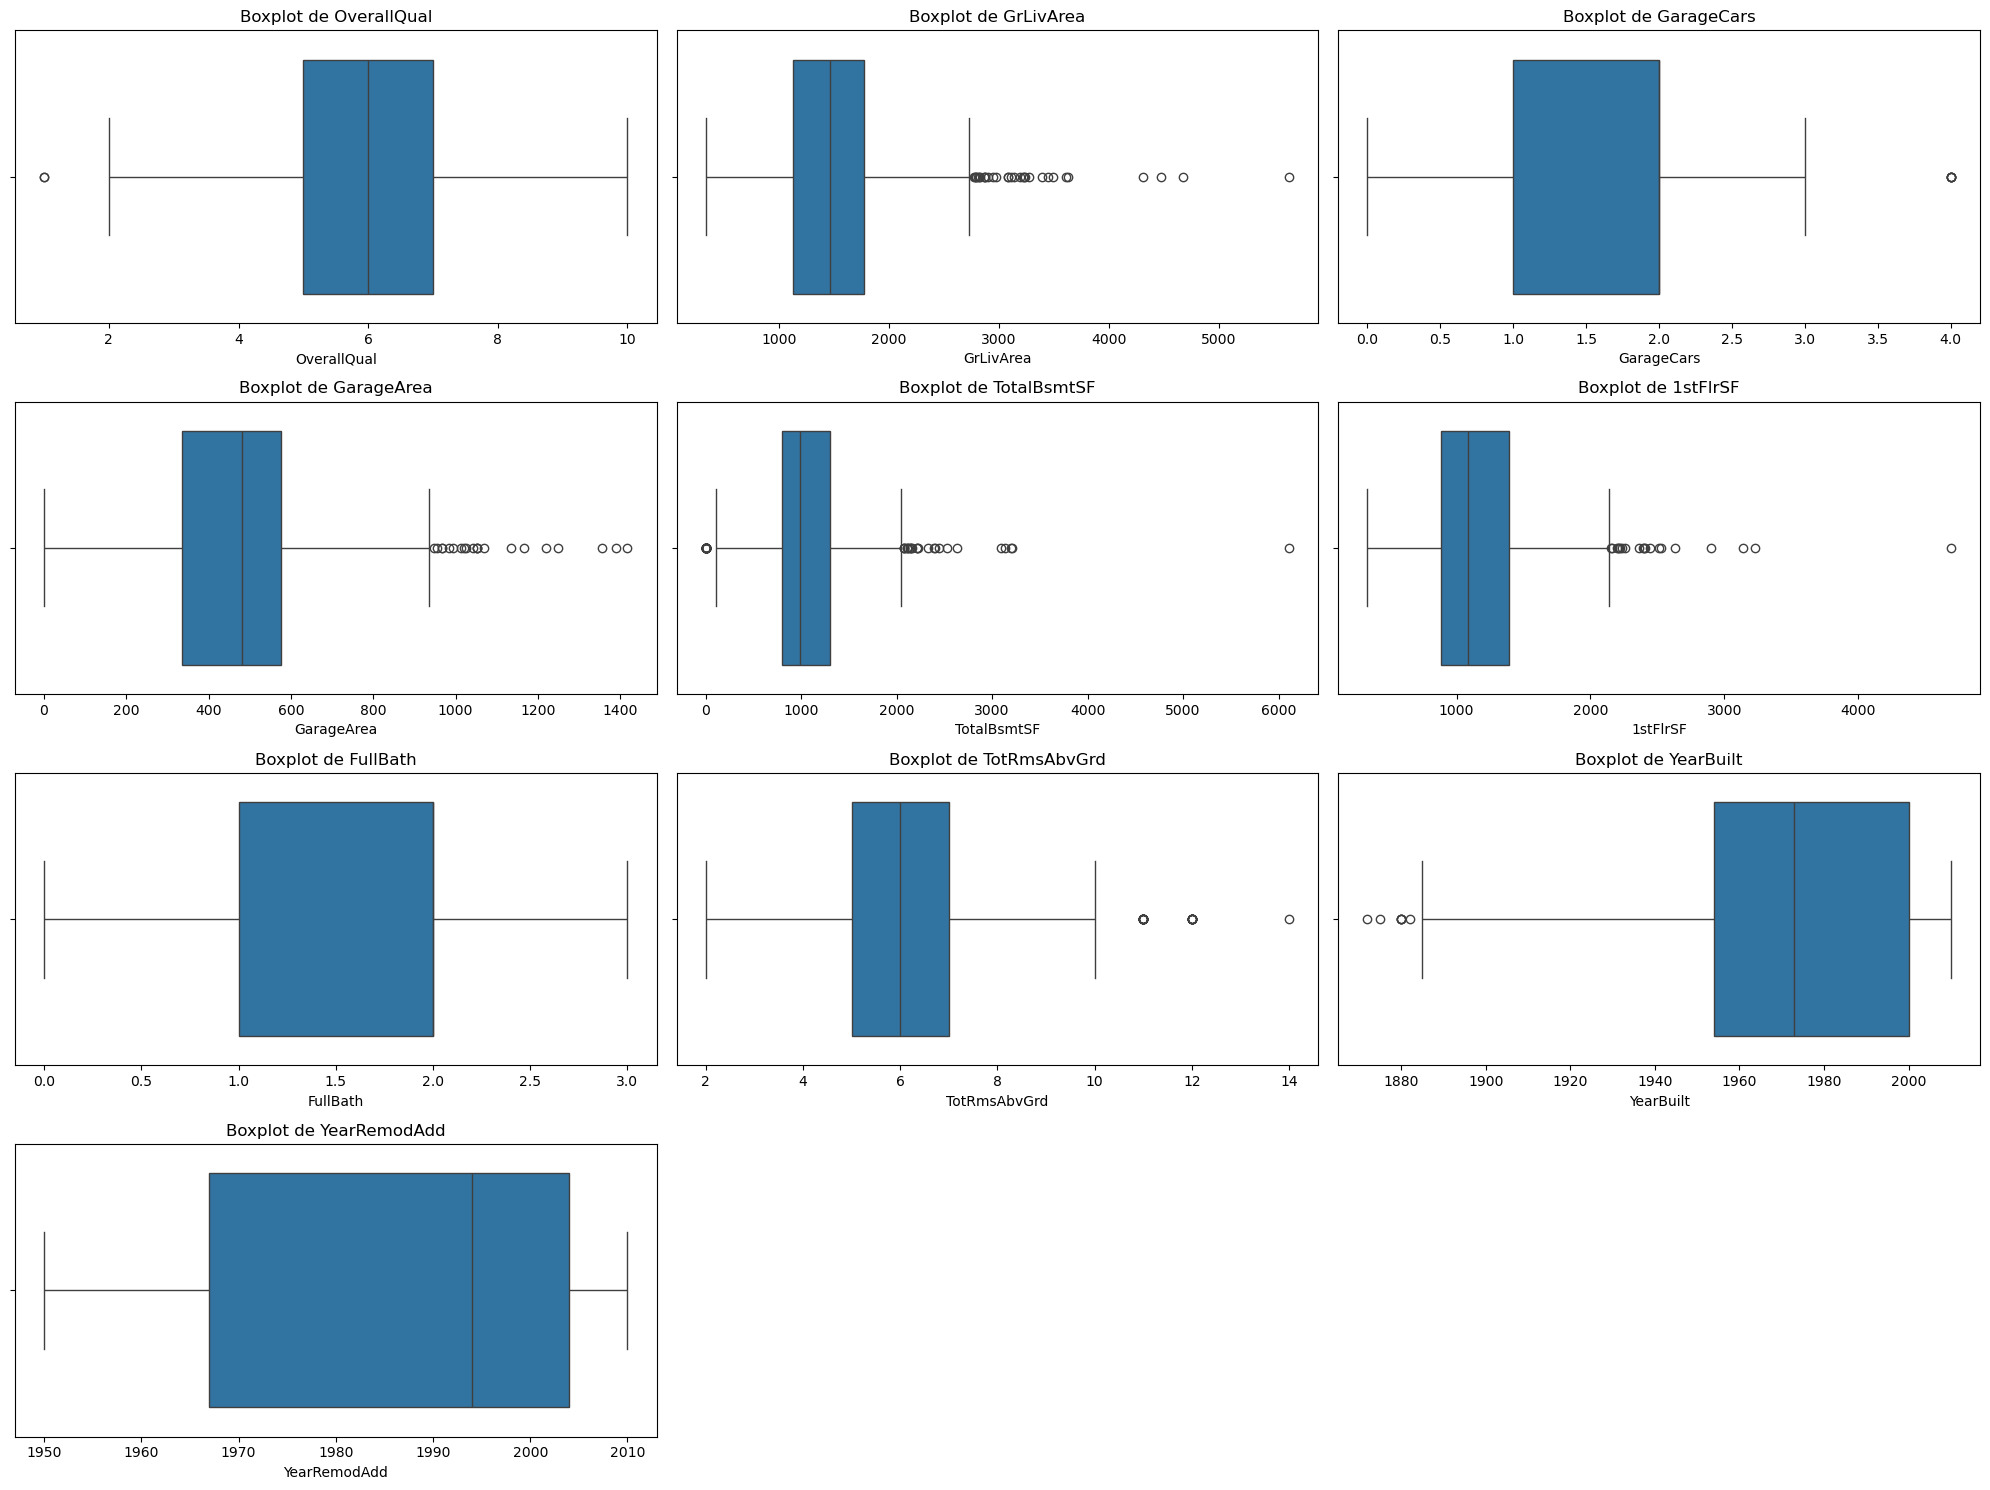

In [183]:

important_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
                      'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd',
                      'YearBuilt', 'YearRemodAdd']

# Boxplots para cada variable importante
plt.figure(figsize=(20, 15))
for i, feature in enumerate(important_features[1:], 1):  # Excluimos SalePrice para los boxplots
    plt.subplot(4, 3, i)
    sns.boxplot(x=house_price_train[feature])
    plt.title(f'Boxplot de {feature}')
plt.tight_layout()
plt.show()

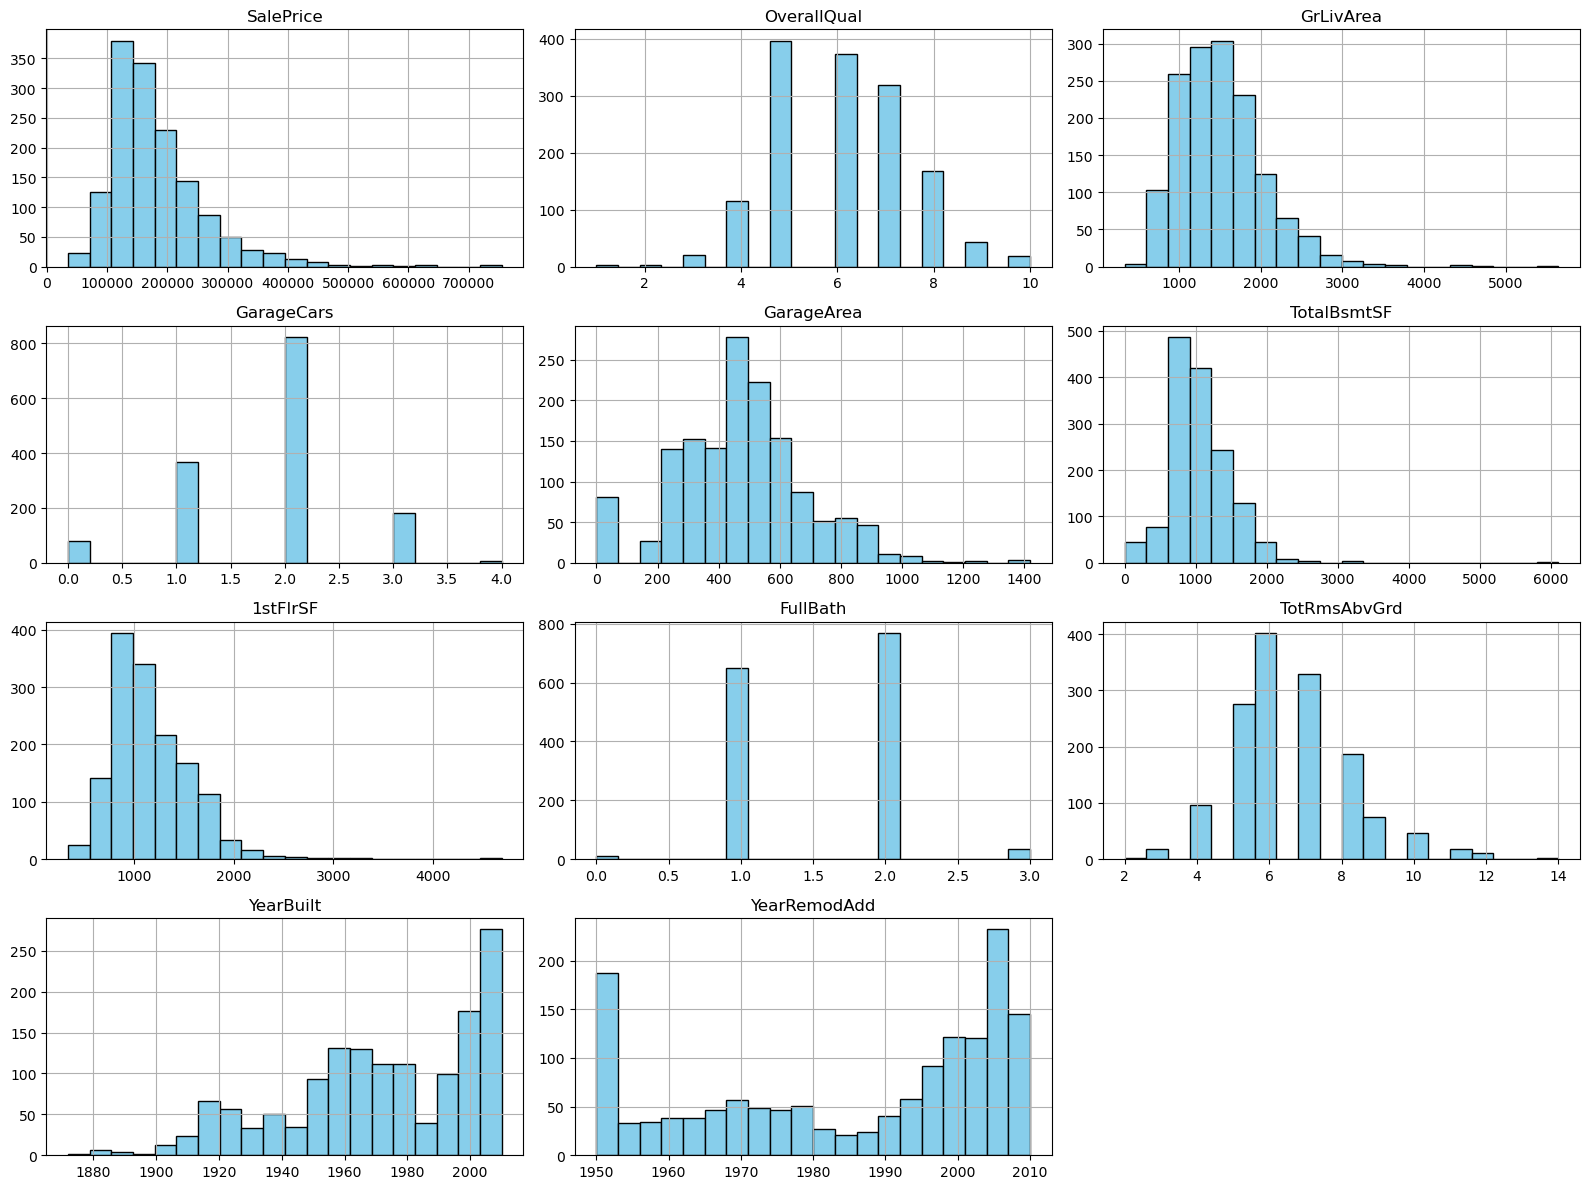

In [184]:
house_price_train[important_features].hist(bins=20, figsize=(16, 12), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

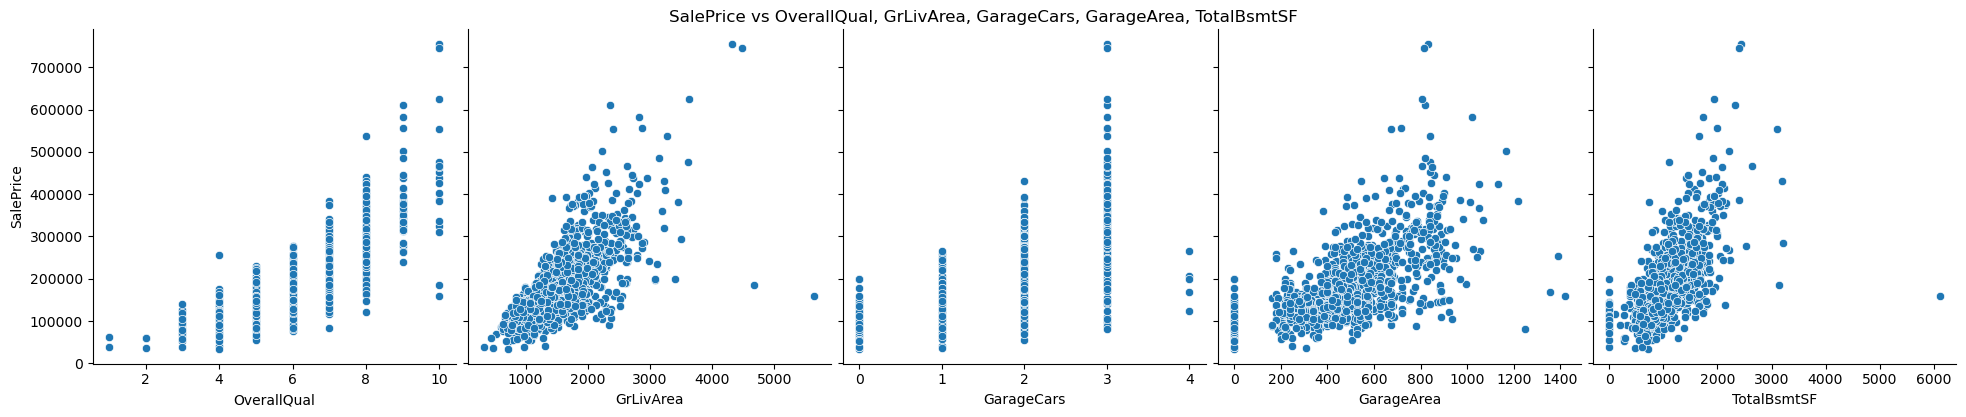

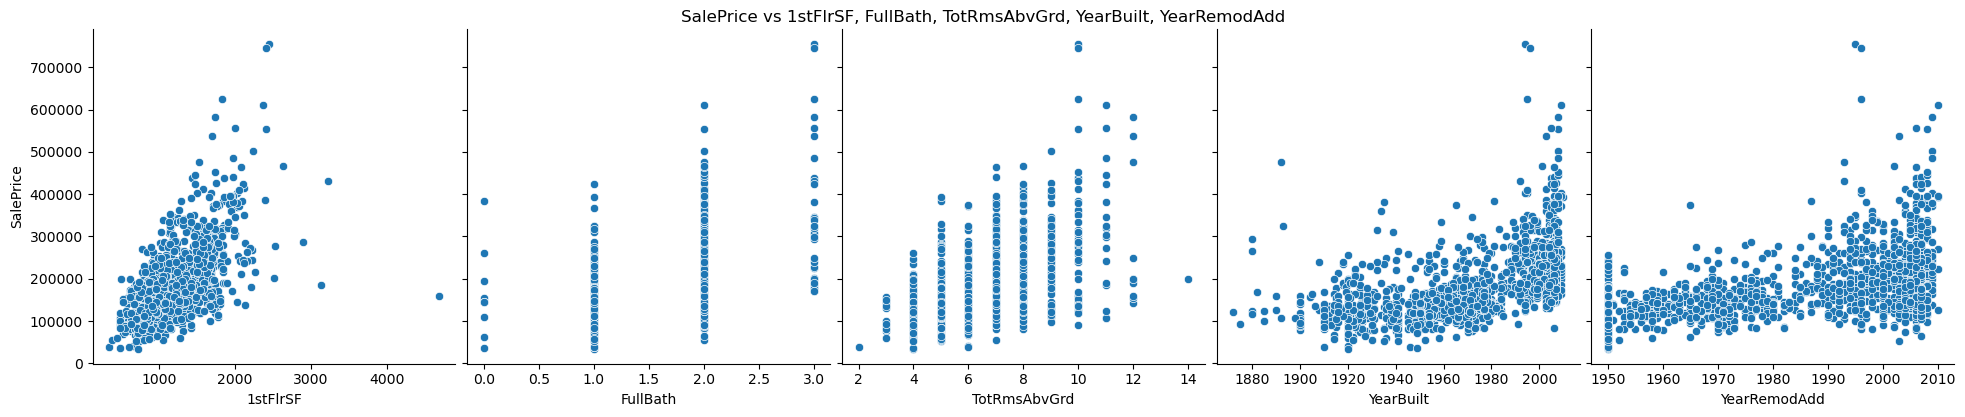

In [185]:
for i in range(1, len(important_features), 5):
    vars_chunk = important_features[i:i+5] 
    sns.pairplot(data=house_price_train,
                 x_vars=vars_chunk,
                 y_vars=['SalePrice'],
                 height=4)
    plt.suptitle(f'SalePrice vs {", ".join(vars_chunk)}', y=1.02)
    plt.show()

## Creacion del dataset final para el modelo

In [186]:
numeric_corr_array = np.array(house_price_train_numeric_corr.index)
categorical_corr_array = np.array(house_price_train_categorical_corr.index)

In [187]:
numeric_data = house_price_train[numeric_corr_array]
categorical_data = house_price_train_categorical_encoded[categorical_corr_array]
salePrice = house_price_train['SalePrice']

house_price_train_final = pd.concat([numeric_data, categorical_data, salePrice], axis=1)

house_price_train_final.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageFinish_Unf,KitchenQual_TA,ExterQual_TA,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,False,False,False,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,False,True,True,181500
2,7,1786,2,608,920,920,2,6,2001,2002,False,False,False,223500
3,7,1717,3,642,756,961,1,7,1915,1970,True,False,True,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,False,False,False,250000


In [188]:
print(house_price_train_final.shape)
print(house_price_train_final.columns)
print(house_price_train_final.info())

(1460, 14)
Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageFinish_Unf', 'KitchenQual_TA', 'ExterQual_TA', 'SalePrice'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OverallQual       1460 non-null   int64
 1   GrLivArea         1460 non-null   int64
 2   GarageCars        1460 non-null   int64
 3   GarageArea        1460 non-null   int64
 4   TotalBsmtSF       1460 non-null   int64
 5   1stFlrSF          1460 non-null   int64
 6   FullBath          1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   YearBuilt         1460 non-null   int64
 9   YearRemodAdd      1460 non-null   int64
 10  GarageFinish_Unf  1460 non-null   bool 
 11  KitchenQual_TA    1460 non-null   bool 
 

### Guardar el dataset final

In [189]:
house_price_train_final.to_csv('Data/house_price_train_final.csv', index=False)

## Encontrar el mejor modelo

### **Primero se va a mirar la efectividad de un modelo de regresión en base al dataset original "test.csv" y cual es el mejor modelo para este dataset.**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings

In [27]:
train = pd.read_csv('Data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
# Llenar valores nulos
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna('None')
    else:
        train[col] = train[col].fillna(train[col].median())

# Codificar variables categóricas
cols = train.select_dtypes(include='object').columns
for col in cols:
    lbl = LabelEncoder()
    train[col] = lbl.fit_transform(train[col])

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}
results = {}

### Evaluar cada modelo con validación cruzada

In [32]:
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    results[name] = {
        'RMSE CV': rmse_scores.mean(),
        'RMSE Std': rmse_scores.std()
    }
    print(f"{name}: RMSE = {rmse_scores.mean():.2f} (±{rmse_scores.std():.2f})")


Linear Regression: RMSE = 43327.36 (±12295.52)
Ridge Regression: RMSE = 42953.01 (±11723.79)
Lasso Regression: RMSE = 43319.92 (±12288.17)
ElasticNet: RMSE = 34549.00 (±8442.49)


C:\Users\LENOVO\Documents\Trabajos U.sabana\7sem\Analitica\Corte1\ETL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e+09, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\Documents\Trabajos U.sabana\7sem\Analitica\Corte1\ETL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.668e+08, tolerance: 5.256e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\Documents\Trabajos U.sabana\7sem\Analitica\Corte1\ETL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You

Random Forest: RMSE = 30361.32 (±4827.78)
Gradient Boosting: RMSE = 28942.25 (±4071.20)


### Encontrar el mejor modelo basado en RMSE

In [33]:
best_model_name = min(results, key=lambda x: results[x]['RMSE CV'])
print(f"\nEl mejor modelo es: {best_model_name}")


El mejor modelo es: Gradient Boosting


### Optimizar hiperparámetros del mejor modelo

In [34]:
if best_model_name == 'Linear Regression':
    best_model = LinearRegression()
    param_grid = {}
elif best_model_name == 'Ridge Regression':
    best_model = Ridge(random_state=42)
    param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
elif best_model_name == 'Lasso Regression':
    best_model = Lasso(random_state=42)
    param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
elif best_model_name == 'ElasticNet':
    best_model = ElasticNet(random_state=42)
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
elif best_model_name == 'Random Forest':
    best_model = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
else:  # Gradient Boosting
    best_model = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }

### Realizar búsqueda de hiperparámetros si hay parámetros para optimizar

In [35]:
if param_grid:
    print(f"\nOptimizando hiperparámetros para {best_model_name}...")
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    print(f"Mejores parámetros: {best_params}")
    final_model = grid_search.best_estimator_
else:
    print(f"\nEntrenando modelo final {best_model_name}...")
    best_model.fit(X_train_scaled, y_train)
    final_model = best_model


Optimizando hiperparámetros para Gradient Boosting...
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}


### Evaluar el modelo final

In [36]:
y_pred = final_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nResultados del modelo final ({best_model_name}):")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")



Resultados del modelo final (Gradient Boosting):
RMSE: 29255.71
R²: 0.8884


### **Ahora se va a probar con el dataset limpio llamado house_price_train_final.csv, y se volvera a buscar su mejor modelo**

In [37]:
house_price_train_final = pd.read_csv('Data/house_price_train_final.csv')
house_price_train_final.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageFinish_Unf,KitchenQual_TA,ExterQual_TA,SalePrice
0,7,1710,2,548,856,856,2,8,2003,2003,False,False,False,208500
1,6,1262,2,460,1262,1262,2,6,1976,1976,False,True,True,181500
2,7,1786,2,608,920,920,2,6,2001,2002,False,False,False,223500
3,7,1717,3,642,756,961,1,7,1915,1970,True,False,True,140000
4,8,2198,3,836,1145,1145,2,9,2000,2000,False,False,False,250000


In [38]:
X = house_price_train_final.drop('SalePrice', axis=1)
y = house_price_train_final['SalePrice']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}
results = {}



### Evaluar cada modelo con validación cruzada

In [42]:
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    results[name] = {
        'RMSE CV': rmse_scores.mean(),
        'RMSE Std': rmse_scores.std()
    }
    print(f"{name}: RMSE = {rmse_scores.mean():.2f} (±{rmse_scores.std():.2f})")


Linear Regression: RMSE = 38317.09 (±7602.27)
Ridge Regression: RMSE = 38308.38 (±7587.28)
Lasso Regression: RMSE = 38316.89 (±7601.63)
ElasticNet: RMSE = 38724.17 (±5982.53)
Random Forest: RMSE = 33302.56 (±5795.84)
Gradient Boosting: RMSE = 31890.55 (±5408.78)


### Encontrar el mejor modelo basado en RMSE

In [43]:
best_model_name = min(results, key=lambda x: results[x]['RMSE CV'])
print(f"\nEl mejor modelo es: {best_model_name}")


El mejor modelo es: Gradient Boosting


### Optimizar hiperparámetros del mejor modelo

In [44]:
if best_model_name == 'Linear Regression':
    best_model = LinearRegression()
    param_grid = {}
elif best_model_name == 'Ridge Regression':
    best_model = Ridge(random_state=42)
    param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
elif best_model_name == 'Lasso Regression':
    best_model = Lasso(random_state=42)
    param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
elif best_model_name == 'ElasticNet':
    best_model = ElasticNet(random_state=42)
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
elif best_model_name == 'Random Forest':
    best_model = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
else:  # Gradient Boosting
    best_model = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }

### Realizar búsqueda de hiperparámetros si hay parámetros para optimizar

In [45]:
if param_grid:
    print(f"\nOptimizando hiperparámetros para {best_model_name}...")
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    print(f"Mejores parámetros: {best_params}")
    final_model = grid_search.best_estimator_
else:
    print(f"\nEntrenando modelo final {best_model_name}...")
    best_model.fit(X_train_scaled, y_train)
    final_model = best_model


Optimizando hiperparámetros para Gradient Boosting...
Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


### Evaluar el modelo final

In [46]:
y_pred = final_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nResultados del modelo final ({best_model_name}):")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")



Resultados del modelo final (Gradient Boosting):
RMSE: 29036.89
R²: 0.8901


## Aplicación del modelo


## **Modelo con test original**

In [47]:
train = pd.read_csv('Data/train.csv')
# Llenar valores nulos
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = train[col].fillna('None')
    else:
        train[col] = train[col].fillna(train[col].median())

# Codificar variables categóricas
cols = train.select_dtypes(include='object').columns
for col in cols:
    lbl = LabelEncoder()
    train[col] = lbl.fit_transform(train[col])

X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}
results = {}


# Evaluar cada modelo con validación cruzada
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    results[name] = {
        'RMSE CV': rmse_scores.mean(),
        'RMSE Std': rmse_scores.std()
    }
    #print(f"{name}: RMSE = {rmse_scores.mean():.2f} (±{rmse_scores.std():.2f})")


# Encontrar el mejor modelo basado en RMSE
best_model_name = min(results, key=lambda x: results[x]['RMSE CV'])
#print(f"\nEl mejor modelo es: {best_model_name}")

# Optimizar hiperparámetros del mejor modelo
if best_model_name == 'Linear Regression':
    best_model = LinearRegression()
    param_grid = {}
elif best_model_name == 'Ridge Regression':
    best_model = Ridge(random_state=42)
    param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
elif best_model_name == 'Lasso Regression':
    best_model = Lasso(random_state=42)
    param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
elif best_model_name == 'ElasticNet':
    best_model = ElasticNet(random_state=42)
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
elif best_model_name == 'Random Forest':
    best_model = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
else:  # Gradient Boosting
    best_model = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }

# Realizar búsqueda de hiperparámetros si hay parámetros para optimizar
if param_grid:
    #print(f"\nOptimizando hiperparámetros para {best_model_name}...")
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    #print(f"Mejores parámetros: {best_params}")
    final_model = grid_search.best_estimator_
else:
    #print(f"\nEntrenando modelo final {best_model_name}...")
    best_model.fit(X_train_scaled, y_train)
    final_model = best_model

# Evaluar el modelo final
y_pred = final_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#print(f"\nResultados del modelo final ({best_model_name}):")
#print(f"RMSE: {rmse:.2f}")
#print(f"R²: {r2:.4f}")


C:\Users\LENOVO\Documents\Trabajos U.sabana\7sem\Analitica\Corte1\ETL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.410e+09, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\Documents\Trabajos U.sabana\7sem\Analitica\Corte1\ETL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.668e+08, tolerance: 5.256e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO\Documents\Trabajos U.sabana\7sem\Analitica\Corte1\ETL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You

### Visualizar residuos

In [48]:
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
plt.savefig('residuos.png')
plt.close()

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de residuos')
plt.savefig('distribucion_residuos.png')
plt.close()

In [50]:

# Si el mejor modelo permite análisis de importancia de características
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    # Obtener importancia de características
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Visualizar las 15 características más importantes
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('15 características más importantes')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.close()
    
    print("\nCaracterísticas más importantes:")
    print(feature_importance.head(10))


Características más importantes:
        Feature  Importance
17  OverallQual    0.497256
46    GrLivArea    0.146569
61   GarageCars    0.041887
38  TotalBsmtSF    0.036949
34   BsmtFinSF1    0.033794
43     1stFlrSF    0.027937
44     2ndFlrSF    0.027879
30     BsmtQual    0.018163
4       LotArea    0.017333
19    YearBuilt    0.015338


In [51]:

# Cargar datos de prueba y hacer predicciones para enviar
try:
    # Cargar datos de prueba
    house_price_test = pd.read_csv('Data/test.csv')
    
    # Procesar los datos de prueba de la misma manera que los datos de entrenamiento
    
    # Primero, maneja las columnas que se eliminaron durante el entrenamiento
    cols_to_drop = ['Id'] + [col for col in house_price_test.columns if col not in X.columns and col != 'Id']
    house_price_test_processed = house_price_test.drop(columns=cols_to_drop, errors='ignore')
    
    # Manejar valores faltantes en columnas numéricas
    for col in house_price_test_processed.select_dtypes(include=['float64', 'int64']).columns:
        if house_price_test_processed[col].isna().sum() > 0:
            # Usar la mediana para imputar valores numéricos faltantes
            house_price_test_processed[col] = house_price_test_processed[col].fillna(house_price_test_processed[col].median())
    
    # Manejar valores faltantes en columnas categóricas
    for col in house_price_test_processed.select_dtypes(include=['object']).columns:
        if house_price_test_processed[col].isna().sum() > 0:
            # Usar el modo para imputar valores categóricos faltantes
            house_price_test_processed[col] = house_price_test_processed[col].fillna(house_price_test_processed[col].mode()[0])
    
    # Codificar variables categóricas
    house_price_test_encoded = pd.get_dummies(house_price_test_processed, drop_first=True)
    
    # Asegurar que el conjunto de prueba tenga las mismas columnas que el de entrenamiento
    for col in X.columns:
        if col not in house_price_test_encoded.columns:
            house_price_test_encoded[col] = 0
    
    # Mantener solo las columnas utilizadas en el entrenamiento
    house_price_test_final = house_price_test_encoded[X.columns]
    
    # Verificar que no hay valores NaN
    assert not house_price_test_final.isna().any().any(), "Aún hay valores NaN en los datos procesados"
    
    # Escalar los datos
    house_price_test_scaled = scaler.transform(house_price_test_final)
    
    # Hacer predicciones
    test_predictions = final_model.predict(house_price_test_scaled)
    
    # Crear el formato de envío
    submission = pd.DataFrame({
        'Id': house_price_test['Id'],
        'SalePrice': test_predictions
    })
    
    # Guardar el archivo de envío
    submission.to_csv('submission_test.csv', index=False)
    print("\nArchivo de envío creado como 'submission_test.csv'")
except Exception as e:
    print(f"\nNo se pudieron generar predicciones para el conjunto de prueba: {e}")
    print("Nota: Para generar predicciones, asegúrate de que los datos de prueba estén preprocesados correctamente.")


Archivo de envío creado como 'submission_test.csv'


### Gráficación del rendimiento

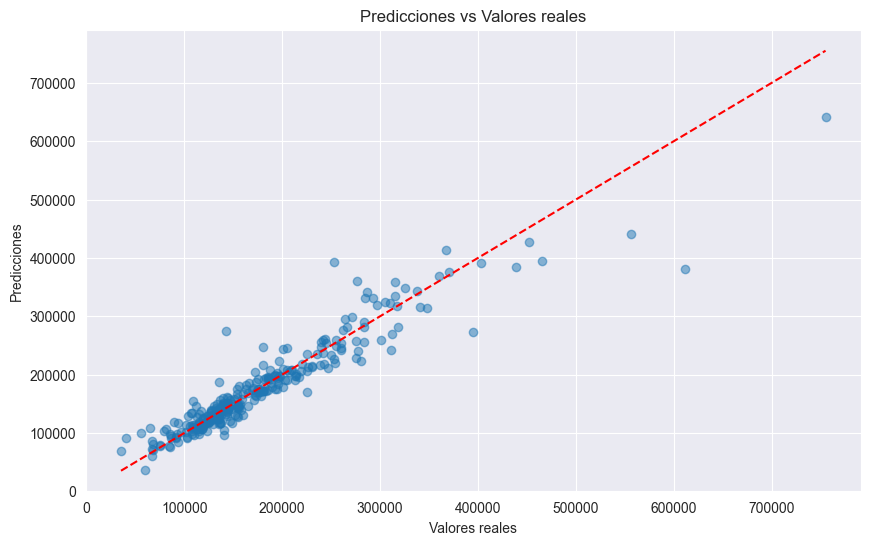

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.savefig('predicciones_vs_reales.png')
plt.show()

## **Modelo con dataset final**

In [53]:
house_price_train_final = pd.read_csv('Data/house_price_train_final.csv')
#house_price_train_final.head()
X = house_price_train_final.drop('SalePrice', axis=1)
y = house_price_train_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}
results = {}


# Evaluar cada modelo con validación cruzada
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    results[name] = {
        'RMSE CV': rmse_scores.mean(),
        'RMSE Std': rmse_scores.std()
    }
    #print(f"{name}: RMSE = {rmse_scores.mean():.2f} (±{rmse_scores.std():.2f})")


# Encontrar el mejor modelo basado en RMSE
best_model_name = min(results, key=lambda x: results[x]['RMSE CV'])
#print(f"\nEl mejor modelo es: {best_model_name}")

# Optimizar hiperparámetros del mejor modelo
if best_model_name == 'Linear Regression':
    best_model = LinearRegression()
    param_grid = {}
elif best_model_name == 'Ridge Regression':
    best_model = Ridge(random_state=42)
    param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
elif best_model_name == 'Lasso Regression':
    best_model = Lasso(random_state=42)
    param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]}
elif best_model_name == 'ElasticNet':
    best_model = ElasticNet(random_state=42)
    param_grid = {
        'alpha': [0.001, 0.01, 0.1, 1.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    }
elif best_model_name == 'Random Forest':
    best_model = RandomForestRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
else:  # Gradient Boosting
    best_model = GradientBoostingRegressor(random_state=42)
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }

# Realizar búsqueda de hiperparámetros si hay parámetros para optimizar
if param_grid:
    #print(f"\nOptimizando hiperparámetros para {best_model_name}...")
    grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_params = grid_search.best_params_
    #print(f"Mejores parámetros: {best_params}")
    final_model = grid_search.best_estimator_
else:
    #print(f"\nEntrenando modelo final {best_model_name}...")
    best_model.fit(X_train_scaled, y_train)
    final_model = best_model

# Evaluar el modelo final
y_pred = final_model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

#print(f"\nResultados del modelo final ({best_model_name}):")
#print(f"RMSE: {rmse:.2f}")
#print(f"R²: {r2:.4f}")


### Visualizar residuos

In [54]:
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')
plt.savefig('residuos.png')
plt.close()

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de residuos')
plt.savefig('distribucion_residuos.png')
plt.close()

In [56]:

# Si el mejor modelo permite análisis de importancia de características
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    # Obtener importancia de características
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    # Visualizar las 15 características más importantes
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('15 características más importantes')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.close()
    
    print("\nCaracterísticas más importantes:")
    print(feature_importance.head(10))


Características más importantes:
             Feature  Importance
0        OverallQual    0.548688
1          GrLivArea    0.174629
4        TotalBsmtSF    0.074331
2         GarageCars    0.045252
5           1stFlrSF    0.043900
9       YearRemodAdd    0.032628
8          YearBuilt    0.027084
10  GarageFinish_Unf    0.019325
3         GarageArea    0.013267
6           FullBath    0.009936


### Cargar datos de prueba y hacer predicciones para enviar

In [57]:
try:
    # Cargar datos de prueba
    house_price_test = pd.read_csv('Data/test.csv')
    
    # Procesar los datos de prueba de la misma manera que los datos de entrenamiento
    
    # Primero, maneja las columnas que se eliminaron durante el entrenamiento
    cols_to_drop = ['Id'] + [col for col in house_price_test.columns if col not in X.columns and col != 'Id']
    house_price_test_processed = house_price_test.drop(columns=cols_to_drop, errors='ignore')
    
    # Manejar valores faltantes en columnas numéricas
    for col in house_price_test_processed.select_dtypes(include=['float64', 'int64']).columns:
        if house_price_test_processed[col].isna().sum() > 0:
            # Usar la mediana para imputar valores numéricos faltantes
            house_price_test_processed[col] = house_price_test_processed[col].fillna(house_price_test_processed[col].median())
    
    # Manejar valores faltantes en columnas categóricas
    for col in house_price_test_processed.select_dtypes(include=['object']).columns:
        if house_price_test_processed[col].isna().sum() > 0:
            # Usar el modo para imputar valores categóricos faltantes
            house_price_test_processed[col] = house_price_test_processed[col].fillna(house_price_test_processed[col].mode()[0])
    
    # Codificar variables categóricas
    house_price_test_encoded = pd.get_dummies(house_price_test_processed, drop_first=True)
    
    # Asegurar que el conjunto de prueba tenga las mismas columnas que el de entrenamiento
    for col in X.columns:
        if col not in house_price_test_encoded.columns:
            house_price_test_encoded[col] = 0
    
    # Mantener solo las columnas utilizadas en el entrenamiento
    house_price_test_final = house_price_test_encoded[X.columns]
    
    # Verificar que no hay valores NaN
    assert not house_price_test_final.isna().any().any(), "Aún hay valores NaN en los datos procesados"
    
    # Escalar los datos
    house_price_test_scaled = scaler.transform(house_price_test_final)
    
    # Hacer predicciones
    test_predictions = final_model.predict(house_price_test_scaled)
    
    # Crear el formato de envío
    submission = pd.DataFrame({
        'Id': house_price_test['Id'],
        'SalePrice': test_predictions
    })
    
    # Guardar el archivo de envío
    submission.to_csv('submission_final.csv', index=False)
    print("\nArchivo de envío creado como 'submission_final.csv'")
except Exception as e:
    print(f"\nNo se pudieron generar predicciones para el conjunto de prueba: {e}")
    print("Nota: Para generar predicciones, asegúrate de que los datos de prueba estén preprocesados correctamente.")


Archivo de envío creado como 'submission_final.csv'


### Gráficación del rendimiento

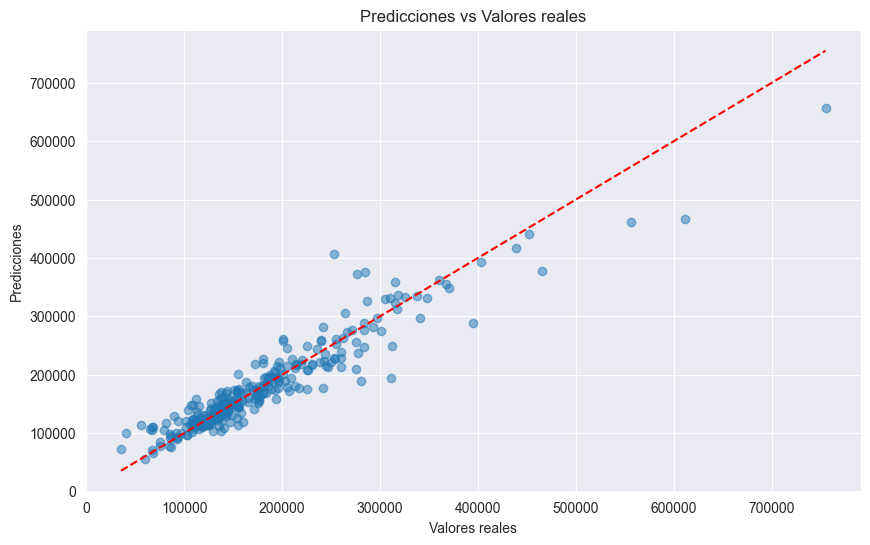

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.savefig('predicciones_vs_reales.png')
plt.show()

## **revisar el sobre ajuste del modelo**

In [59]:
# Calcular métricas en datos de entrenamiento
y_train_pred = final_model.predict(X_train_scaled)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Comparar con métricas en datos de prueba
print(f"\nComparación de rendimiento:")
print(f"RMSE en entrenamiento: {rmse_train:.2f}")
print(f"RMSE en prueba: {rmse:.2f}")
print(f"Diferencia: {rmse - rmse_train:.2f}")
print(f"R² en entrenamiento: {r2_train:.4f}")
print(f"R² en prueba: {r2:.4f}")
print(f"Diferencia: {r2_train - r2:.4f}")

# Interpretación de resultados
if rmse_train / rmse < 0.7 or r2_train - r2 > 0.1:
    print("\nAdvertencia: Posible sobreajuste detectado.")
    print("El modelo tiene un rendimiento significativamente mejor en datos de entrenamiento.")
else:
    print("\nEl modelo parece estar bien balanceado entre sesgo y varianza.")


Comparación de rendimiento:
RMSE en entrenamiento: 19616.96
RMSE en prueba: 29036.89
Diferencia: 9419.93
R² en entrenamiento: 0.9355
R² en prueba: 0.8901
Diferencia: 0.0454

Advertencia: Posible sobreajuste detectado.
El modelo tiene un rendimiento significativamente mejor en datos de entrenamiento.
